# <span style="color:red"> Numerical Simulation 7 </span>

## Exercise 7.1

#### <span style="color:black"> Objective </span>

In this exercise we wanted to analyze the autocorrelation functions and the uncertain's dependence from the block lenght L during a metropolis simulation of a lennard-jones interacting system in three different situations:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

#### <span style="color:black"> Making of simulation </span>

The simulation started with a c++ code from which I printed out $M=5\times 10^5$ instant values for both pressure and internal energy. I started with the solid phase in a perfect fcc configuration, after the equilibration that tooks $100$ of steps It was possible to initiate taking the instant values. The steps lenght was set to 0,12 in order to have $50\%$ of acceptance.  For the liquid phase, starting from the last configuration of solid simulation, it tooks $200$ steps to equilibrate. Finally the gas phase, starting from last configuration of liquid simulation, almost didn't need an equilibration. The steps lenght was set to 3,5 with an acceptance of $60\%$, it wasn't possible to pass below this threshold.

After that I had evaluated autocorrelation functions and error from a python code, with this code's results I made several picture for the analysis.

#### <span style="color:black"> Data Analysis </span>

All the autocorrelations for every phase show the expected exponential decay. The solid one decays to zero in $75$ steps while the liquid's autocorrelations takes at least double this steps. The gas autocorrelation goes to zero very quicly due to the long step required to respect the $50$ rules. 

The error as function of block lenght L shows that from around $1000$ steps in each block the uncertains saturate to a maximum value for solid while for the liquid it takes more, this is in accord with the previous analysis of the autocorrelations. The gas data exhibit different behaviour probably due to the fluctuations of the data set. I've tried to run again the gas simulation after more equilibration steps but it didn't seem to affect the results. 

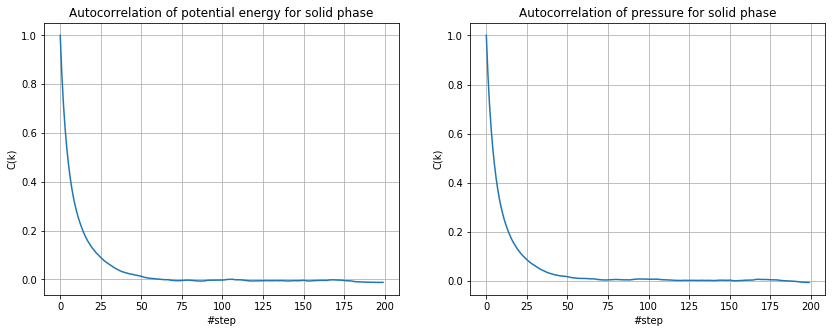

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def corr(i, v):
    prod=0
    sum=0
    sum2=0
    for j in range(0,M-i):
        prod+=v[j]*v[j+i]
        sum+=v[j]
        sum2+=v[j]*v[j]
    prod/=(M-i)
    sum/=(M-i)
    sum2/=(M-i)
    return (prod-sum*sum)/(sum2-sum*sum)

M=5*pow(10,5)
epot, press=np.loadtxt("instant_val_s.dat", unpack=True)
r=200
x=np.arange(r)
Ce=np.zeros(r)
Cp=np.zeros(r)
for i in range(r):
    Ce[i]=corr(i,epot)
    Cp[i]=corr(i,press)

fig=plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x,Ce)
plt.title ("Autocorrelation of potential energy for solid phase")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.subplot(122)
plt.plot(x,Cp)
plt.title ("Autocorrelation of pressure for solid phase")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.show()

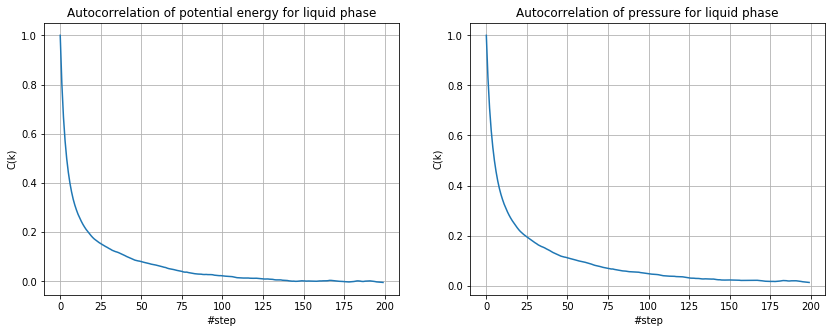

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def corr(i, v):
    prod=0
    sum=0
    sum2=0
    for j in range(0,M-i):
        prod+=v[j]*v[j+i]
        sum+=v[j]
        sum2+=v[j]*v[j]
    prod/=(M-i)
    sum/=(M-i)
    sum2/=(M-i)
    return (prod-sum*sum)/(sum2-sum*sum)

M=5*pow(10,5)
epot, press=np.loadtxt("instant_val_L.dat", unpack=True)
r=200
x=np.arange(r)
Ce=np.zeros(r)
Cp=np.zeros(r)
for i in range(r):
    Ce[i]=corr(i,epot)
    Cp[i]=corr(i,press)

fig=plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x,Ce)
plt.title ("Autocorrelation of potential energy for liquid phase")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.subplot(122)
plt.plot(x,Cp)
plt.title ("Autocorrelation of pressure for liquid phase")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.show()

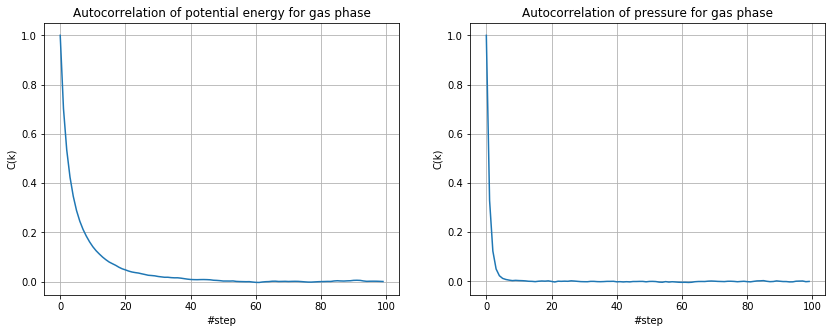

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def corr(i, v):
    prod=0
    sum=0
    sum2=0
    for j in range(0,M-i):
        prod+=v[j]*v[j+i]
        sum+=v[j]
        sum2+=v[j]*v[j]
    prod/=(M-i)
    sum/=(M-i)
    sum2/=(M-i)
    return (prod-sum*sum)/(sum2-sum*sum)

M=5*pow(10,5)
epot, press=np.loadtxt("instant_val_G.dat", unpack=True)
r=100
x=np.arange(r)
Ce=np.zeros(r)
Cp=np.zeros(r)
for i in range(r):
    Ce[i]=corr(i,epot)
    Cp[i]=corr(i,press)

fig=plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x,Ce)
plt.title ("Autocorrelation of potential energy for gas phase")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.subplot(122)
plt.plot(x,Cp)
plt.title ("Autocorrelation of pressure for gas phase")
plt.xlabel('#step')
plt.ylabel('C(k)')
plt.grid(True)

plt.show()

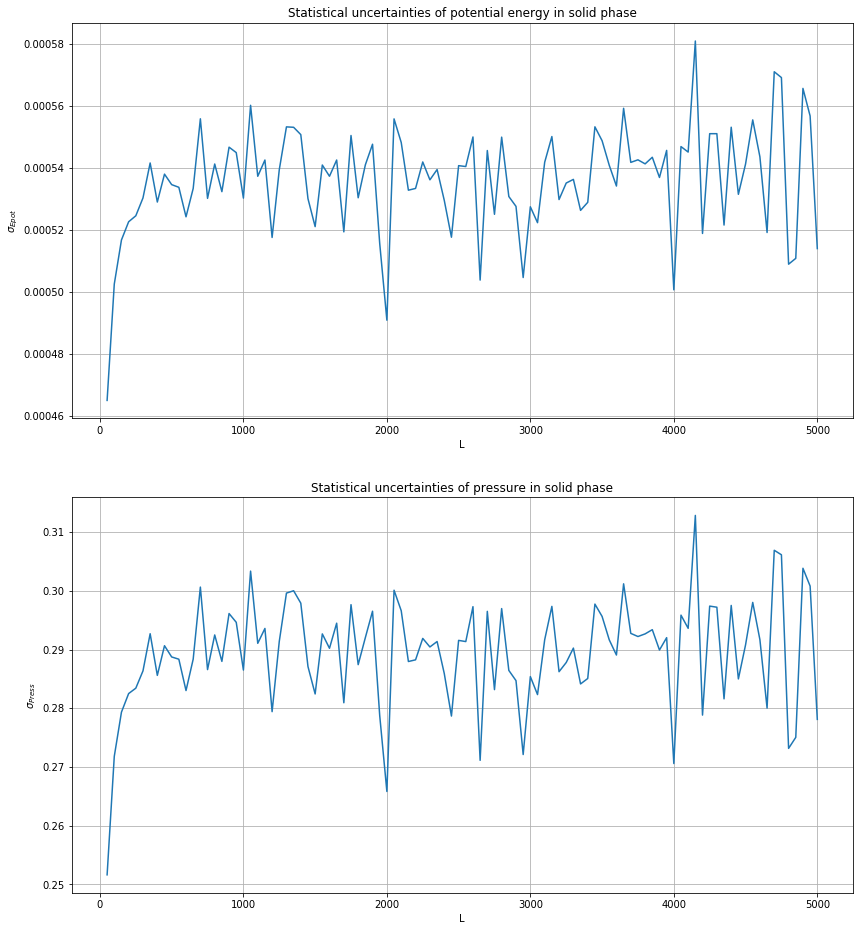

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
M=5*pow(10,5)
epot, press=np.loadtxt("instant_val_s.dat", unpack=True)

def error(AV,AV2,n):  
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)
def staterror(M,L,r):
    N=int(M/L)
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)

    for i in range(N):
        sum = 0
        for j in range(L):
            k = j+i*L
            sum += r[k]
        ave[i] = sum/L       
        av2[i] = (ave[i])**2 
        
    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j]
            su2_prog[i] += av2[j]
        sum_prog[i]/=(i+1)
        su2_prog[i]/=(i+1)
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    return err_prog[N-1]


errU=np.zeros(100)
errP=np.zeros(100)
j=0
for i in range (100):
    L=(i+1)*50
    errU[j]=staterror(M,L,epot)
    errP[j]=staterror(M,L,press)
    j+=1
    
x=np.arange(j)
x+=1
x*=50

fig=plt.figure(figsize=(14,16))

plt.subplot(211)
plt.plot(x,errU,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Epot}$')
plt.title("Statistical uncertainties of potential energy in solid phase")
plt.grid(True)

plt.subplot(212)
plt.plot(x,errP,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Press}$')
plt.title("Statistical uncertainties of pressure in solid phase")
plt.grid(True)



plt.show()

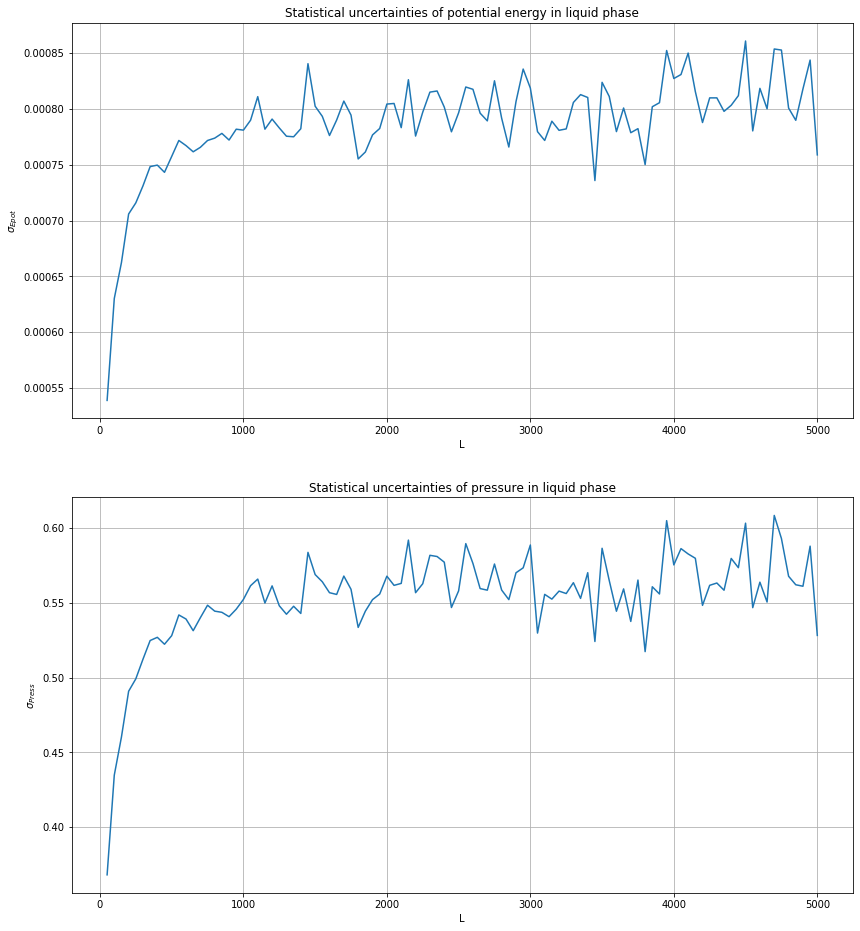

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
M=5*pow(10,5)
epot, press=np.loadtxt("instant_val_L.dat", unpack=True)

def error(AV,AV2,n):  
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)
def staterror(M,L,r):
    N=int(M/L)
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)

    for i in range(N):
        sum = 0
        for j in range(L):
            k = j+i*L
            sum += r[k]
        ave[i] = sum/L       
        av2[i] = (ave[i])**2 
        
    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j]
            su2_prog[i] += av2[j]
        sum_prog[i]/=(i+1)
        su2_prog[i]/=(i+1)
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    return err_prog[N-1]


errU=np.zeros(100)
errP=np.zeros(100)
j=0
for i in range (100):
    L=(i+1)*50
    errU[j]=staterror(M,L,epot)
    errP[j]=staterror(M,L,press)
    j+=1
    
x=np.arange(j)
x+=1
x*=50

fig=plt.figure(figsize=(14,16))

plt.subplot(211)
plt.plot(x,errU,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Epot}$')
plt.title("Statistical uncertainties of potential energy in liquid phase")
plt.grid(True)

plt.subplot(212)
plt.plot(x,errP,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Press}$')
plt.title("Statistical uncertainties of pressure in liquid phase")
plt.grid(True)


plt.show()

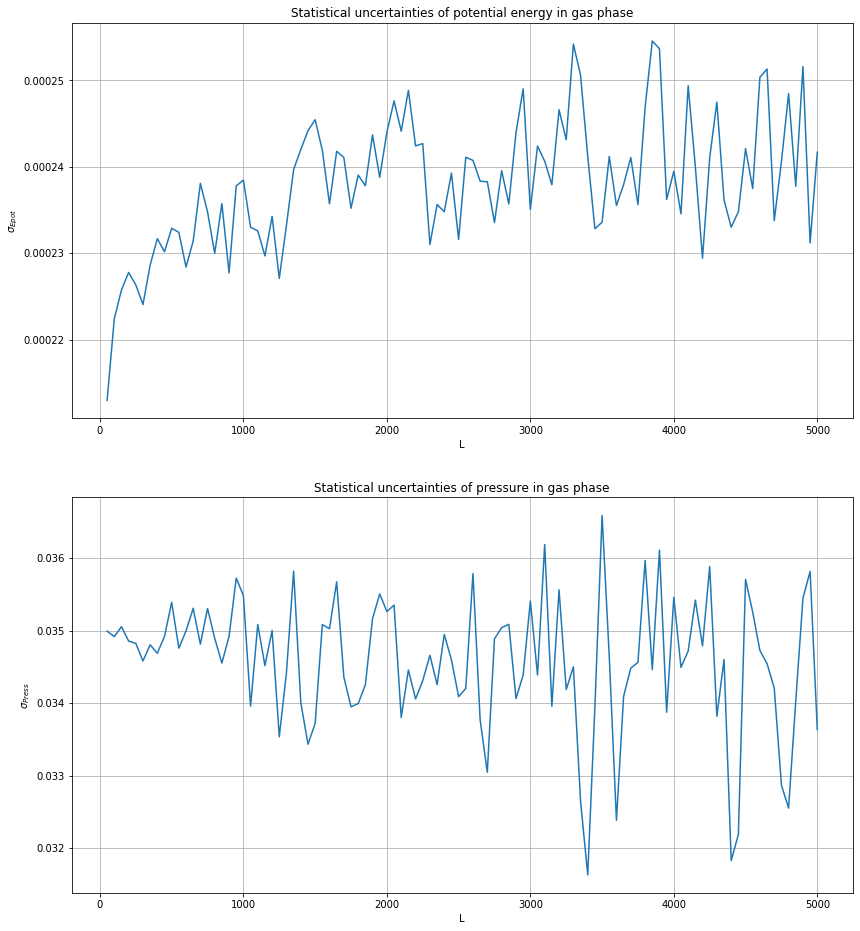

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
M=5*pow(10,5)
epot, press=np.loadtxt("instant_val_G.dat", unpack=True)

def error(AV,AV2,n):  
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)
def staterror(M,L,r):
    N=int(M/L)
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)

    for i in range(N):
        sum = 0
        for j in range(L):
            k = j+i*L
            sum += r[k]
        ave[i] = sum/L       
        av2[i] = (ave[i])**2 
        
    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j]
            su2_prog[i] += av2[j]
        sum_prog[i]/=(i+1)
        su2_prog[i]/=(i+1)
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    return err_prog[N-1]


errU=np.zeros(100)
errP=np.zeros(100)
j=0
for i in range (100):
    L=(i+1)*50
    errU[j]=staterror(M,L,epot)
    errP[j]=staterror(M,L,press)
    j+=1
    
x=np.arange(j)
x+=1
x*=50

fig=plt.figure(figsize=(14,16))

plt.subplot(211)
plt.plot(x,errU,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Epot}$')
plt.title("Statistical uncertainties of potential energy in gas phase")
plt.grid(True)

plt.subplot(212)
plt.plot(x,errP,)
plt.xlabel('L')
plt.ylabel('$\sigma_{Press}$')
plt.title("Statistical uncertainties of pressure in gas phase")
plt.grid(True)


plt.show()

## Exercise 7.2 / 7.3 / 7.4

#### <span style="color:black"> Objective </span>

We need to include the calculation of radial distribution function $g(r)$ inside the monte carlo NVT code and the molecular dynamics code of exercise 4. After that we aim to perform simulation of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:

1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

with NVT code we want to evaluate $\frac{U}{N}$, $P$ and $g(r)$ while with MD code only the radial distribution in order to compare the result between two codes.

#### <span style="color:black"> Code's description </span>

The most intresting part of the code is the calculus of $g(r)$. It was computed as it follows, the distance was divide in $100$ bins, every time the distance between two particle were computed for evaluating the potential energy I found out the corresponding bin and add $+2$. At the end I've normalized with $\rho N \Delta V(r) $
where: $$\Delta V(r)=\frac{4\pi}{3}[(r+\delta r)^3-r^3]$$
#### <span style="color:black"> Result </span>

The results are divided for each phase and before every picture there are a brief summary of parameters and making of simulation. The first picture are energy and pressure, the last picture shows $g(r)$ for NVT code (1st), $g(r)$ for NVE code (2nd) and the difference between the two radial distribution. 

## Solid 

The solid's simulation was made with $N=100$ block and $L=1500$ steps for each block in fact with the analysis of exercise 7.1 is clear that more than $1000$ steps is a sufficient number for limiting efficiently autocorrelation. The two radial distribution $g(r)$ are very similar, the difference, which are not compatible with zero, could be due to the different type of statistical ensemble simulated that are not equal with finite number of particle. It is interesting to observe the emerging periodic shell typical of a cristalline structure and the fact that the hard-core repulsion kills radial distribution under the core's radius. The molecular dynamics simulation wase made with $M=10^7$ and $N=100$.

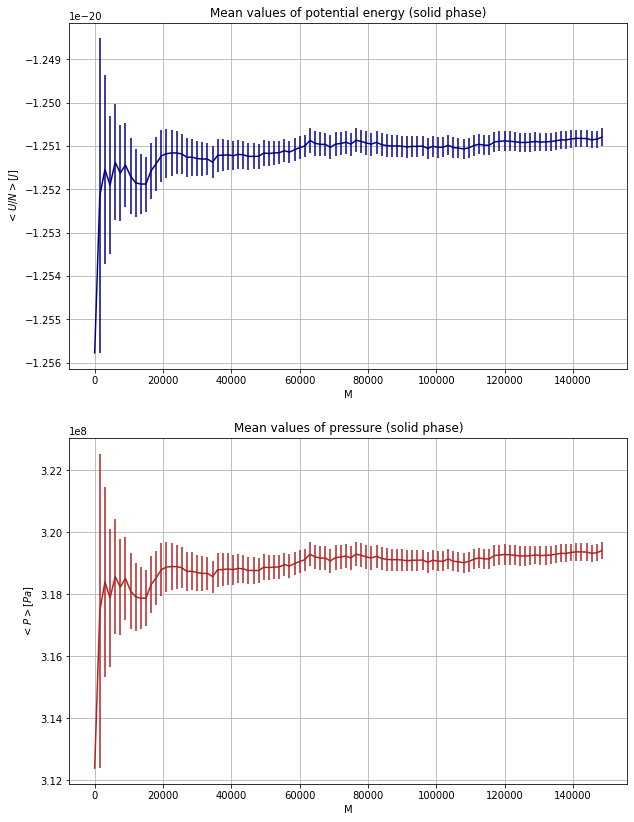

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

epskb=120
eps=120*1.380649*pow(10,-23)
sigma=0.34*pow(10,-9)
m=39.948*1.6605*pow(10,-27)

x = np.arange(100)
x*=1500
#x=np.ndarray.astype(x, dtype=float)
#x*=1000*0.0005*sigma*np.sqrt(m/eps)

Press, errPress =np.loadtxt("output.Pres.S", usecols=(2,3), unpack=True)
Epot, errPot =np.loadtxt("output.Epot.S", usecols=(2,3), unpack=True)

fig=plt.figure(figsize=(10,14))

plt.subplot(211)
plt.errorbar(x, Epot*eps, yerr=errPot*eps, color="darkblue")
plt.xlabel('M')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of potential energy (solid phase)")
plt.grid(True)

plt.subplot(212)
plt.errorbar(x, Press*eps/pow(sigma,3), yerr=errPress*eps/pow(sigma,3), color="firebrick")
plt.xlabel('M')
plt.ylabel('$<P> [Pa]$')
plt.title("Mean values of pressure (solid phase)")
plt.grid(True)

plt.show()

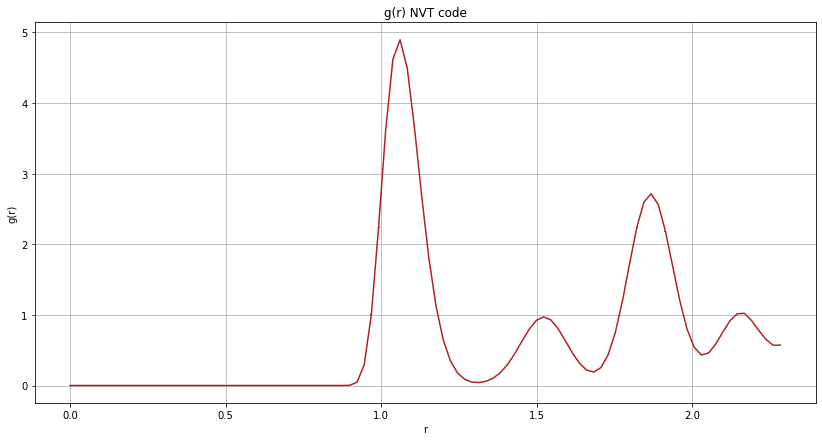

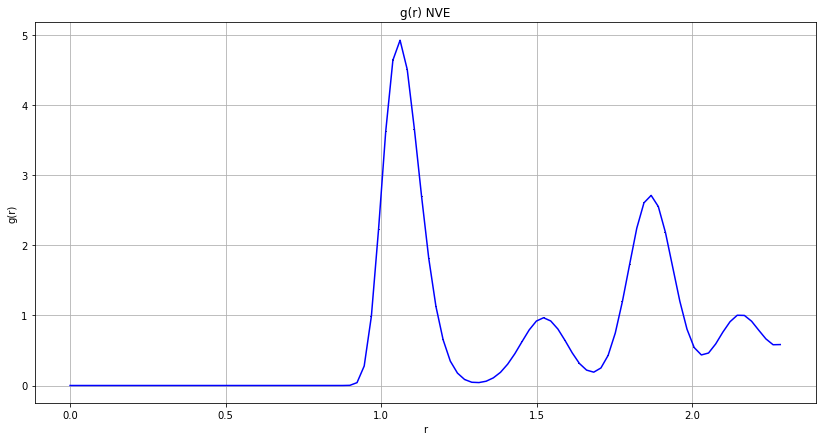

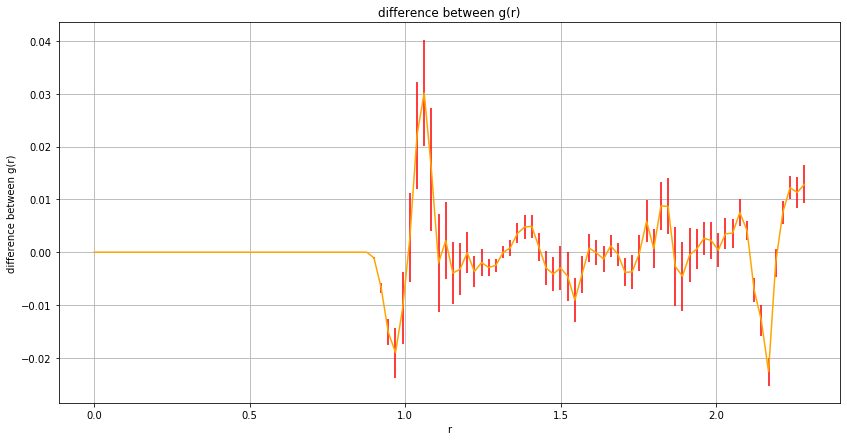

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

bin_size=pow(108/1.1,1/3.)/200
x = np.arange(100)
x=np.ndarray.astype(x, dtype=float)
x*=bin_size

gofrNVT, errNVT=np.loadtxt("output.gave.0", unpack=True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, gofrNVT, yerr=errNVT, color="firebrick", ecolor="black")

plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("g(r) NVT code")
plt.grid(True)


gofrNVE, errNVE=np.loadtxt("NVE_G.S", unpack=True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, gofrNVE,yerr=errNVE, color="blue", ecolor="black")

plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("g(r) NVE")
plt.grid(True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, gofrNVE-gofrNVT,yerr=np.sqrt(errNVT*errNVT+errNVE*errNVE) , color="orange", ecolor="red")

plt.xlabel('r')
plt.ylabel('difference between g(r)')
plt.title("difference between g(r)")
plt.grid(True)

## Liquid

The liquid's simulation was made with $N=100$ block and $L=2500$ steps for each block in fact with the analysis of exercise 7.1 is clear that more than $2000$ steps is a sufficient number for limiting efficiently autocorrelation. The same observations about compatibility between the two $g(r)$ discussed in the solid section hold also for liquid. It's trivial to see that the periodic structure is loosing its sharpness. The molecular dynamics simulation wase made with $M=10^7$ and $N=100$.

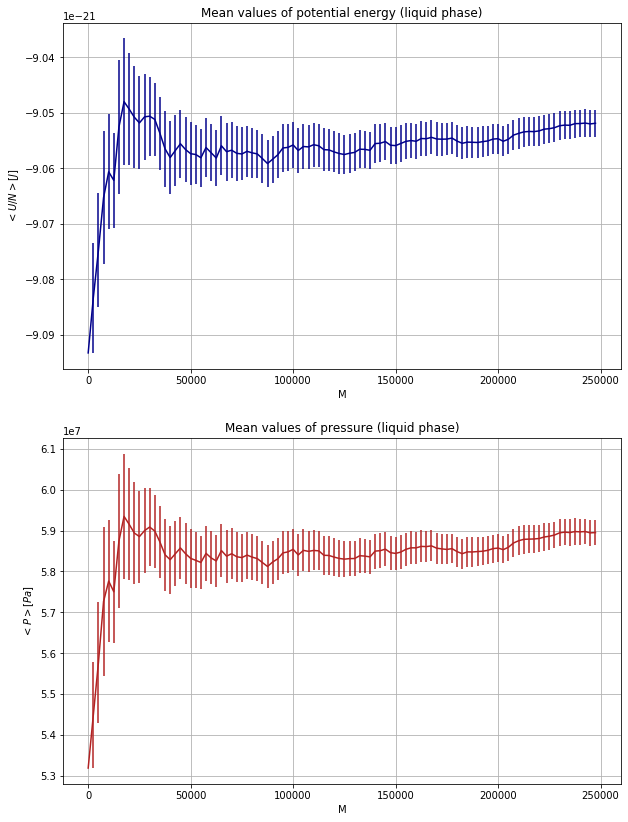

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

epskb=120
eps=120*1.380649*pow(10,-23)
sigma=0.34*pow(10,-9)
m=39.948*1.6605*pow(10,-27)

x = np.arange(100)
x*=2500
#x=np.ndarray.astype(x, dtype=float)
#x*=1000*0.0005*sigma*np.sqrt(m/eps)

Press, errPress =np.loadtxt("output.Pres.L", usecols=(2,3), unpack=True)
Epot, errPot =np.loadtxt("output.Epot.L", usecols=(2,3), unpack=True)

fig=plt.figure(figsize=(10,14))

plt.subplot(211)
plt.errorbar(x, Epot*eps, yerr=errPot*eps, color="darkblue")
plt.xlabel('M')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of potential energy (liquid phase)")
plt.grid(True)

plt.subplot(212)
plt.errorbar(x, Press*eps/pow(sigma,3), yerr=errPress*eps/pow(sigma,3), color="firebrick")
plt.xlabel('M')
plt.ylabel('$<P> [Pa]$')
plt.title("Mean values of pressure (liquid phase)")
plt.grid(True)

plt.show()

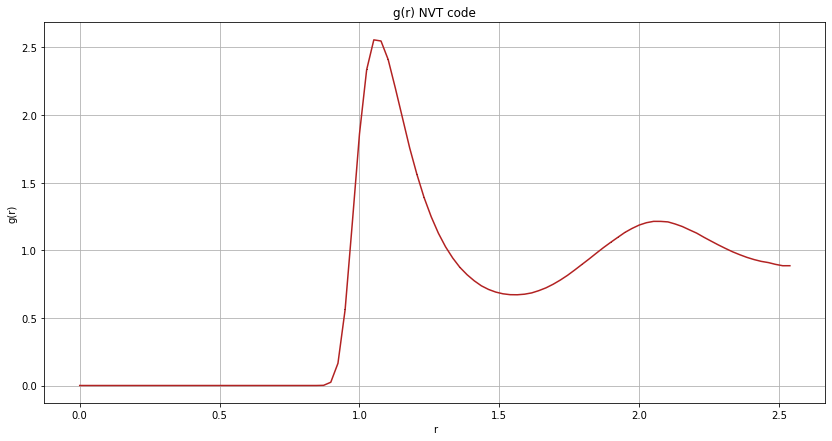

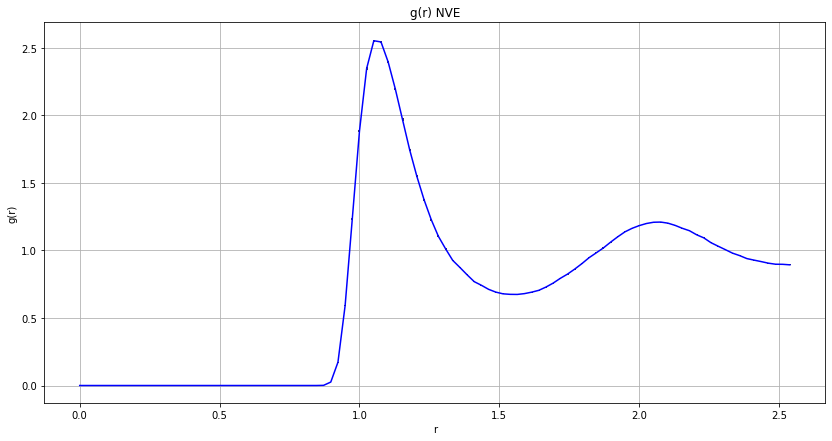

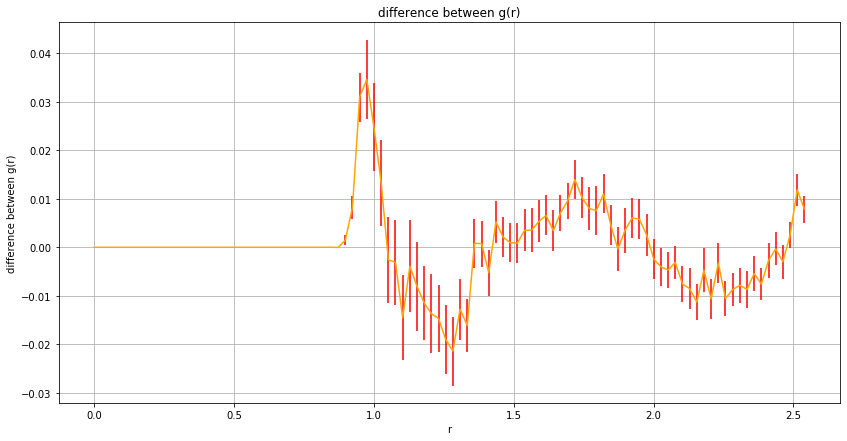

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

bin_size=pow(108/0.8,1/3.)/200
x = np.arange(100)
x=np.ndarray.astype(x, dtype=float)
x*=bin_size

gofrNVT, errNVT=np.loadtxt("output.Gave.L", unpack=True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, gofrNVT, yerr=errNVT, color="firebrick", ecolor="black")

plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("g(r) NVT code")
plt.grid(True)


gofrNVE, errNVE=np.loadtxt("NVE_G.L", unpack=True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, gofrNVE ,yerr=errNVE, color="blue", ecolor="black")

plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("g(r) NVE")
plt.grid(True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, gofrNVE-gofrNVT,yerr=np.sqrt(errNVT*errNVT+errNVE*errNVE) , color="orange", ecolor="red")

plt.xlabel('r')
plt.ylabel('difference between g(r)')
plt.title("difference between g(r)")
plt.grid(True)

## Gas

The simulation of gaseous phase was made with $N=100$ block and $L=3000$ steps for each block. The choiche of the steps inside each blocks was a conservative one in fact from the analisys of exercise 7.1 it seems that $2000$ steps was sufficient for limiting autocorrelation for potential energy while the behaviour of pressure it's not clear. So I've choosen $3000$ steps in order to be more confident about the simulation's statistics. Again the same observation about difference between $g(r)$ hold also for gas. The gas $g(r)$ has no more sign of a periodic structure. The molecular dynamics simulation wase made with $M=10^7$ and $N=100$.

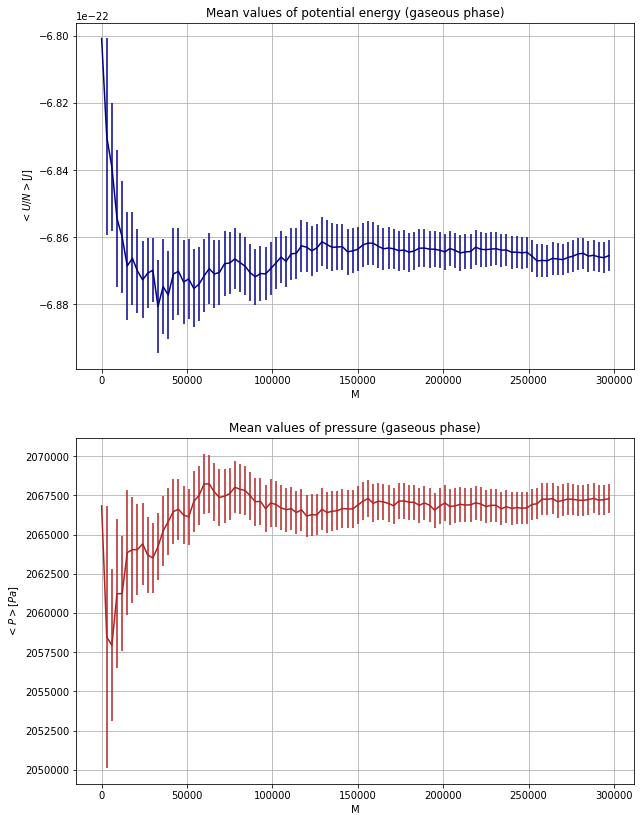

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

epskb=120
eps=120*1.380649*pow(10,-23)
sigma=0.34*pow(10,-9)
m=39.948*1.6605*pow(10,-27)

x = np.arange(100)
x*=3000
#x=np.ndarray.astype(x, dtype=float)
#x*=1000*0.0005*sigma*np.sqrt(m/eps)

Press, errPress =np.loadtxt("output.Pres.G", usecols=(2,3), unpack=True)
Epot, errPot =np.loadtxt("output.Epot.G", usecols=(2,3), unpack=True)

fig=plt.figure(figsize=(10,14))

plt.subplot(211)
plt.errorbar(x, Epot*eps, yerr=errPot*eps, color="darkblue")
plt.xlabel('M')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of potential energy (gaseous phase)")
plt.grid(True)

plt.subplot(212)
plt.errorbar(x, Press*eps/pow(sigma,3), yerr=errPress*eps/pow(sigma,3), color="firebrick")
plt.xlabel('M')
plt.ylabel('$<P> [Pa]$')
plt.title("Mean values of pressure (gaseous phase)")
plt.grid(True)

plt.show()

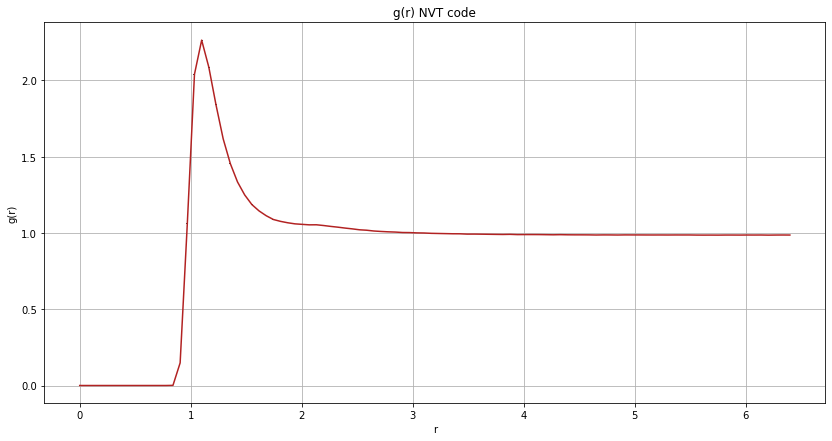

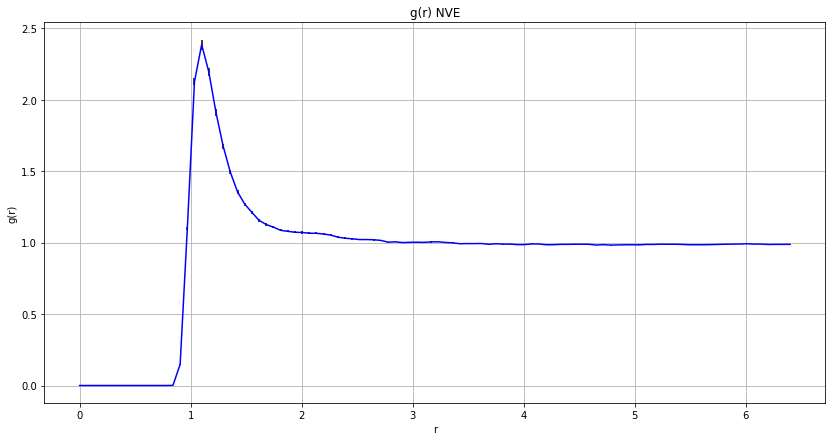

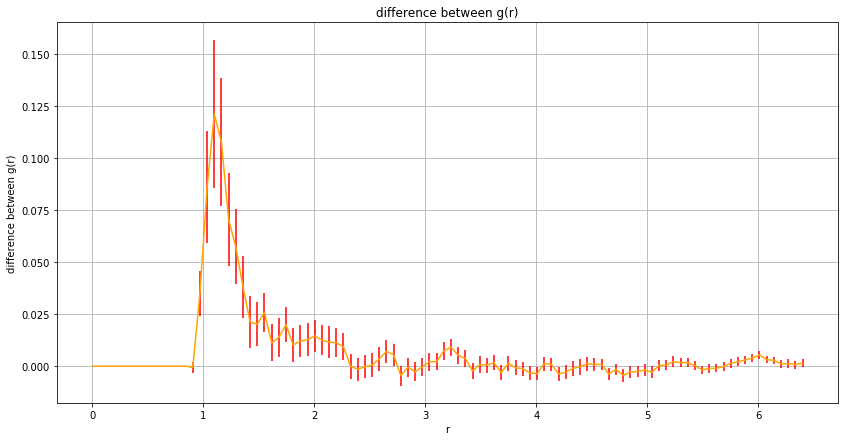

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

bin_size=pow(108/0.05,1/3.)/200
x = np.arange(100)
x=np.ndarray.astype(x, dtype=float)
x*=bin_size

gofrNVT, errNVT=np.loadtxt("output.Gave.G", unpack=True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, gofrNVT, yerr=errNVT, color="firebrick", ecolor="black")

plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("g(r) NVT code")
plt.grid(True)


gofrNVE, errNVE=np.loadtxt("NVE_G.G", unpack=True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, gofrNVE ,yerr=errNVE, color="blue", ecolor="black")

plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("g(r) NVE")
plt.grid(True)

fig=plt.figure(figsize=(14,7))
plt.errorbar(x, gofrNVE-gofrNVT,yerr=np.sqrt(errNVT*errNVT+errNVE*errNVE) , color="orange", ecolor="red")

plt.xlabel('r')
plt.ylabel('difference between g(r)')
plt.title("difference between g(r)")
plt.grid(True)